# TUGAS BESAR ANALISIS DATA SPASIAL

## Install

In [1]:
pip install jupyterlab folium

   ---------------------------------------- 0.0/100.0 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/100.0 kB ? eta -:--:--
   ----------------------- --------------- 61.4/100.0 kB 825.8 kB/s eta 0:00:01
   -------------------------------------- 100.0/100.0 kB 823.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/82.0 kB ? eta -:--:--
   ---------------------------------------- 82.0/82.0 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas geopandas shapely

     ---------------------------------------- 0.0/51.5 kB ? eta -:--:--
     ------- -------------------------------- 10.2/51.5 kB ? eta -:--:--
     -------------------------------------- 51.5/51.5 kB 878.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ------- -------------------------------- 0.2/1.1 MB 6.3 MB/s eta 0:00:01
   ------------- -------------------------- 0.4/1.1 MB 4.6 MB/s eta 0:00:01
   ------------------- -------------------- 0.5/1.1 MB 4.2 MB/s eta 0:00:01
   ----------------------- ---------------- 0.7/1.1 MB 3.8 MB/s eta 0:00:01
   ------------------------------- -------- 0.9/1.1 MB 3.9 MB/s eta 0:00:01
   ---------------------------------------  1.1/1.1 MB 4.1 MB/s eta 0:00:01
   ---------------------------------------  1.1/1.1 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   --------- ----------------

In [3]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


## Library

In [1]:
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from geopy.distance import great_circle
from sklearn.cluster import DBSCAN as dbscan
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Datset

In [2]:
shapefile = "C:/Users/Alvin/Downloads/Data Adsp/Data Muara Enim/enim.shp"
gdf_boundary = gpd.read_file(shapefile)

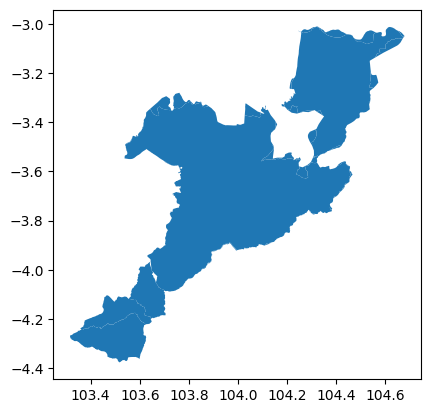

In [3]:
gdf_boundary.plot()
plt.show()

c:\Users\Alvin\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


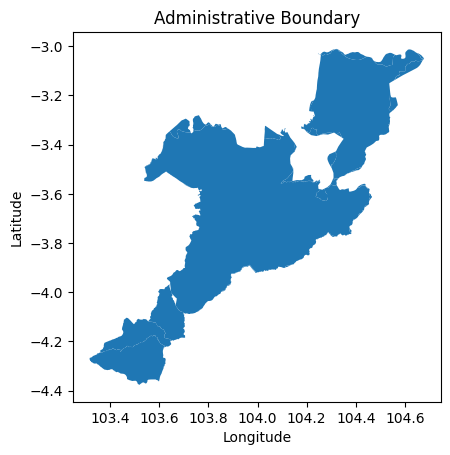

In [5]:
# Import library
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle

# Baca shapefile
shapefile = "C:/Users/Alvin/Downloads/Data Adsp/Data Muara Enim/Fixenim/MuaraEnim.shp"
gdf_boundary = gpd.read_file(shapefile)

# Baca data kepadatan penduduk dari file CSV
file_csv = "D:/S6/Adsp/bismilah enim.csv" # Ganti dengan path file CSV Anda
df_population_density = pd.read_csv(file_csv)

# Perbaiki format koordinat yang menggunakan tanda koma
df_population_density['Latitude'] = df_population_density['Latitude'].str.replace(',', '.').astype(float)
df_population_density['Longitude'] = df_population_density['Longitude'].str.replace(',', '.').astype(float)

# Konversi data CSV ke dalam bentuk geometri titik
geometry = [Point(xy) for xy in zip(df_population_density['Longitude'], df_population_density['Latitude'])]
crs = {'init': 'epsg:4326'}  # WGS84
gdf_population_density = gpd.GeoDataFrame(df_population_density, crs=crs, geometry=geometry)

# Visualisasi batas administrasi
gdf_boundary.plot()
plt.title('Administrative Boundary')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

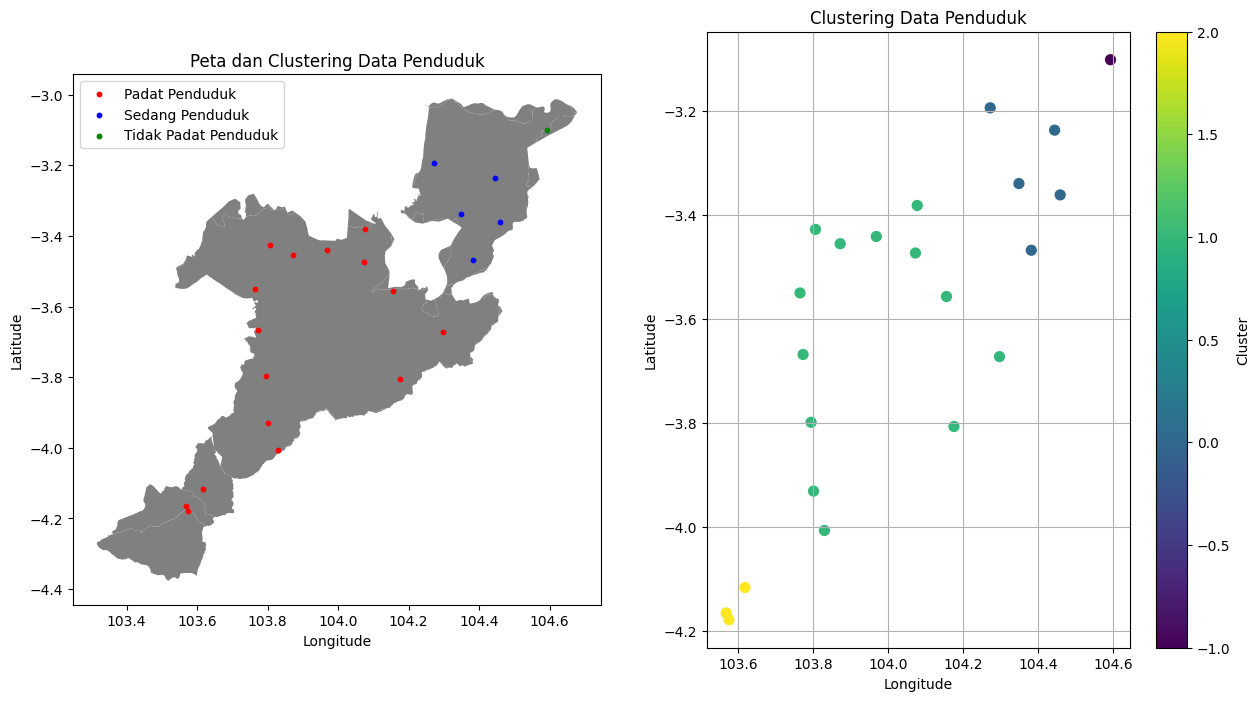

In [6]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Lakukan clustering menggunakan DBSCAN dengan 3 cluster
epsilon = 0.2 # Jarak maksimum antara dua titik agar dianggap sebagai bagian dari satu cluster
min_samples = 2  # Jumlah titik minimum untuk membentuk sebuah cluster
dbscan_cluster = DBSCAN(eps=epsilon, min_samples=min_samples, metric='euclidean').fit(gdf_population_density[['Longitude', 'Latitude']])

# Dapatkan label cluster
cluster_labels = dbscan_cluster.labels_

# Tentukan tiga kategori berdasarkan label cluster
# Misalnya, label -1 dianggap sebagai daerah tidak padat penduduk, sedangkan label lainnya dianggap sebagai daerah padat penduduk
binary_labels = ['Tidak Padat Penduduk' if label == -1 else ('Sedang Penduduk' if label == 0 else 'Padat Penduduk') for label in cluster_labels]

# Tambahkan kolom binary_labels ke dalam DataFrame
gdf_population_density['Ternary_Labels'] = binary_labels

# Plot untuk visualisasi clustering
plt.figure(figsize=(15, 8))

# Plot peta
ax = plt.subplot(121)
gdf_boundary.plot(ax=ax, color='gray')
for category, group in gdf_population_density.groupby('Ternary_Labels'):
    group.plot(ax=ax, color='red' if category == 'Padat Penduduk' else ('blue' if category == 'Sedang Penduduk' else 'green'), markersize=10, label=category)
plt.title('Peta dan Clustering Data Penduduk')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

# Plot clustering
plt.subplot(122)
plt.scatter(gdf_population_density['Longitude'], gdf_population_density['Latitude'], c=cluster_labels, cmap='viridis', s=50)
plt.title('Clustering Data Penduduk')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.grid(True)

plt.show()


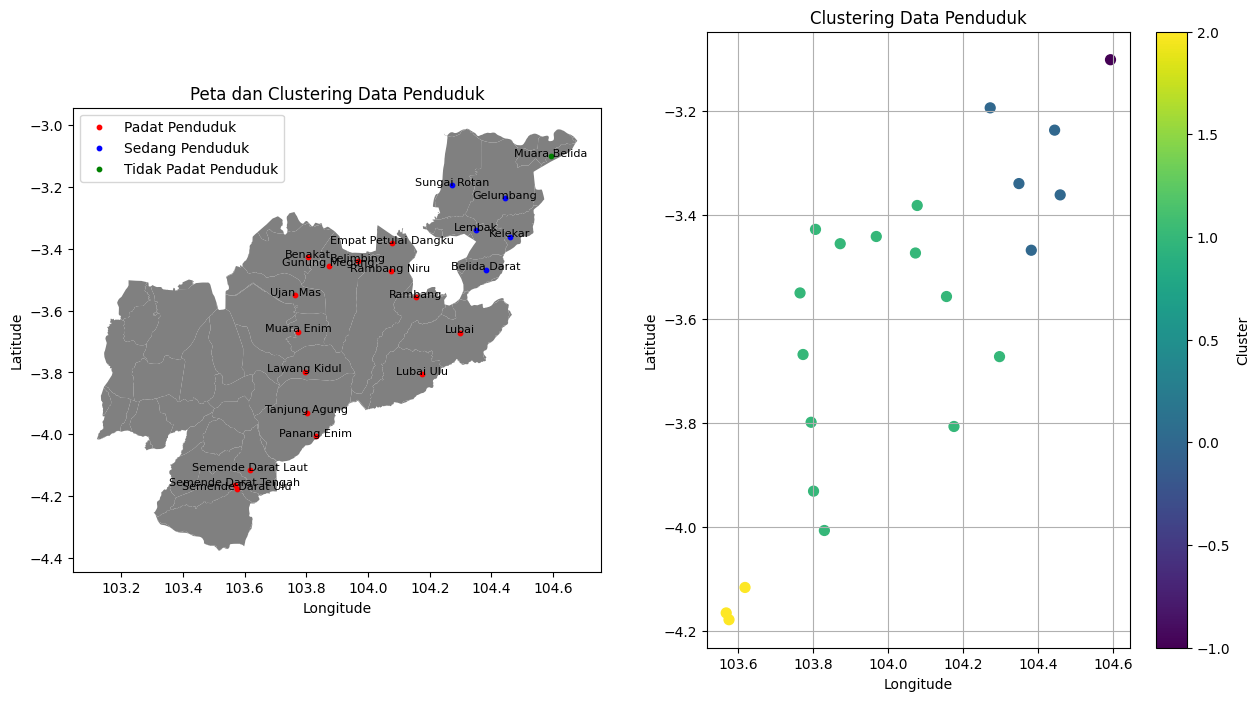

In [18]:
# Plot untuk visualisasi clustering
plt.figure(figsize=(15, 8))

# Plot peta
ax = plt.subplot(121)
gdf_boundary.plot(ax=ax, color='gray')
for category, group in gdf_population_density.groupby('Ternary_Labels'):
    group.plot(ax=ax, color='red' if category == 'Padat Penduduk' else ('blue' if category == 'Sedang Penduduk' else 'green'), markersize=10, label=category)
plt.title('Peta dan Clustering Data Penduduk')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

# Tambahkan label kecamatan dari data CSV
for idx, row in df_population_density.iterrows():
    plt.text(row['Longitude'], row['Latitude'], row['Kecamatan'], fontsize=8, ha='center')

# Plot clustering
plt.subplot(122)
plt.scatter(gdf_population_density['Longitude'], gdf_population_density['Latitude'], c=cluster_labels, cmap='viridis', s=50)
plt.title('Clustering Data Penduduk')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.grid(True)

plt.show()

## Evaluasi

In [19]:
from sklearn.metrics import silhouette_score

# Evaluasi menggunakan Silhouette Score
silhouette_avg = silhouette_score(gdf_population_density[['Longitude', 'Latitude']], cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.30394358226676926


In [20]:
from sklearn.metrics import davies_bouldin_score

# Evaluasi menggunakan Davies-Bouldin Index
dbi_score = davies_bouldin_score(gdf_population_density[['Longitude', 'Latitude']], cluster_labels)
print("Davies-Bouldin Index:", dbi_score)


Davies-Bouldin Index: 0.5455776816263026


In [23]:
import numpy as np

# Menghitung centroid setiap cluster
centroids = np.array([gdf_population_density[cluster_labels == label][['Longitude', 'Latitude']].mean().values
                      for label in np.unique(cluster_labels)])

# Menghitung RMSE
distances = np.linalg.norm(gdf_population_density[['Longitude', 'Latitude']].values -
                           centroids[cluster_labels], axis=1)
rmse = np.sqrt(np.mean(np.square(distances)))

print("RMSE:", rmse)


RMSE: 0.6183110687876675


In [21]:
# Import library
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle

# Baca shapefile
shapefile = '/content/ADMINISTRASIKECAMATAN_AR_50K.shp'
gdf_boundary = gpd.read_file(shapefile)

# Baca data kepadatan penduduk dari file CSV
file_csv = '/content/PendudukMuaraEnim.csv'  # Ganti dengan path file CSV Anda
df_population_density = pd.read_csv(file_csv)

# Perbaiki format koordinat yang menggunakan tanda koma
df_population_density['Latitude'] = df_population_density['Latitude'].str.replace(',', '.').astype(float)
df_population_density['Longitude'] = df_population_density['Longitude'].str.replace(',', '.').astype(float)

# Konversi data CSV ke dalam bentuk geometri titik
geometry = [Point(xy) for xy in zip(df_population_density['Longitude'], df_population_density['Latitude'])]
crs = {'init': 'epsg:4326'}  # WGS84
gdf_population_density = gpd.GeoDataFrame(df_population_density, crs=crs, geometry=geometry)

# Visualisasi batas administrasi
gdf_boundary.plot()
plt.title('Administrative Boundary')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

DriverError: '/content/ADMINISTRASIKECAMATAN_AR_50K.shp' does not exist in the file system, and is not recognized as a supported dataset name.

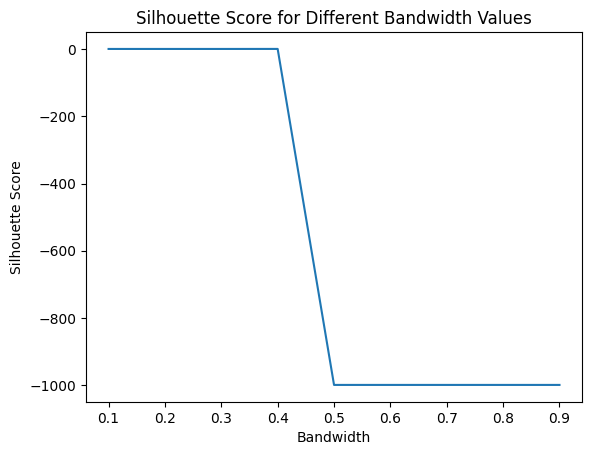

Best Bandwidth: 0.4


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import MeanShift, estimate_bandwidth
import numpy as np

# Inisialisasi list untuk menyimpan nilai bandwidth dan silhouette score
bandwidths = np.arange(0.1, 1.0, 0.1)
silhouette_scores = []

# Iterasi melalui nilai bandwidth yang diinginkan
for bandwidth in bandwidths:
    # Lakukan clustering dengan Mean Shift menggunakan nilai bandwidth saat ini
    meanshift_cluster = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(gdf_population_density[['Longitude', 'Latitude']])

    # Dapatkan label cluster
    cluster_labels = meanshift_cluster.labels_

    # Periksa apakah jumlah kelompok lebih dari satu
    if len(np.unique(cluster_labels)) > 1:
        # Hitung Silhouette Score
        score = silhouette_score(gdf_population_density[['Longitude', 'Latitude']], cluster_labels)
        silhouette_scores.append(score)
    else:
        # Tambahkan nilai negatif sangat rendah jika hanya ada satu kelompok
        silhouette_scores.append(-999)

# Dapatkan nilai terbaik tanpa memperhitungkan nilai-nilai None
best_bandwidth = bandwidths[np.argmax([score for score in silhouette_scores if score is not None])]

# Plot Elbow Plot
plt.plot(bandwidths, silhouette_scores)
plt.xlabel('Bandwidth')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Bandwidth Values')
plt.show()

print("Best Bandwidth:", best_bandwidth)


<ipython-input-7-fd8a1d34c72f>:54: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(gdf_population_density['Longitude'], gdf_population_density['Latitude'], c=gdf_population_density['Population_Category'].map(colors), cmap='viridis', s=50)


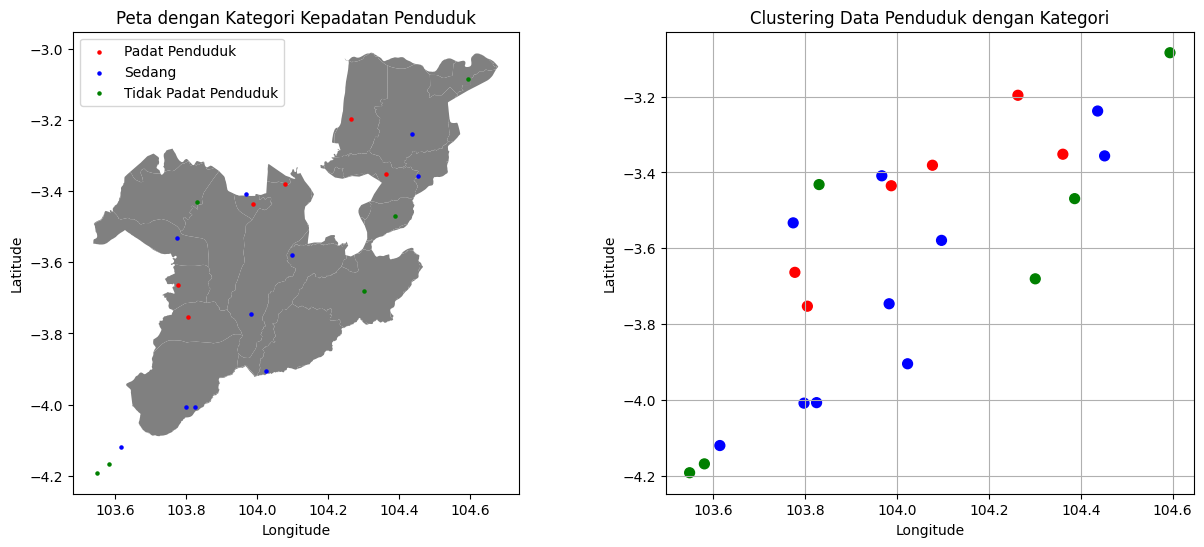

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import MeanShift, estimate_bandwidth
import numpy as np

# Lakukan clustering dengan Mean Shift menggunakan nilai bandwidth terbaik
best_meanshift_cluster = MeanShift(bandwidth=best_bandwidth, bin_seeding=True).fit(gdf_population_density[['Longitude', 'Latitude']])

# Dapatkan label cluster
cluster_labels = best_meanshift_cluster.labels_

# Tentukan dua kategori berdasarkan label cluster
# Misalnya, label -1 dianggap sebagai daerah tidak padat penduduk, sedangkan label lainnya dianggap sebagai daerah padat penduduk
binary_labels = ['Daerah Tidak Padat Penduduk' if label == -1 else 'Daerah Padat Penduduk' for label in cluster_labels]

# Tambahkan kolom binary_labels ke dalam DataFrame
gdf_population_density['Binary_Labels'] = binary_labels

# Hitung statistik deskriptif dari kepadatan penduduk untuk setiap cluster
cluster_statistics = gdf_population_density.groupby('Binary_Labels')['Kepadatan_Penduduk'].describe()

# Tentukan batasan untuk setiap kategori (padat, sedang, tidak padat)
# Misalnya, Anda bisa menggunakan quartile atau persentil untuk menentukan batasan
padat_threshold = cluster_statistics.loc['Daerah Padat Penduduk']['75%']
tidak_padat_threshold = cluster_statistics.loc['Daerah Padat Penduduk']['25%']

# Membagi hasil clustering menjadi tiga kategori berdasarkan batasan yang ditentukan
def categorize_population_density(population_density):
    if population_density > padat_threshold:
        return 'Padat Penduduk'
    elif population_density > tidak_padat_threshold:
        return 'Sedang'
    else:
        return 'Tidak Padat Penduduk'

# Menambahkan kolom kategori ke dalam DataFrame
gdf_population_density['Population_Category'] = gdf_population_density['Kepadatan_Penduduk'].apply(categorize_population_density)

# Plot hasil clustering dengan kategori baru
plt.figure(figsize=(15, 6))

# Plot peta dengan kategori warna berdasarkan kategori kepadatan penduduk
ax = plt.subplot(121)
gdf_boundary.plot(ax=ax, color='gray')
for category, group in gdf_population_density.groupby('Population_Category'):
    group.plot(ax=ax, color='red' if category == 'Padat Penduduk' else 'blue' if category == 'Sedang' else 'green', markersize=5, label=category)
plt.title('Peta dengan Kategori Kepadatan Penduduk')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

# Plot clustering dengan kategori warna
plt.subplot(122)
colors = {'Padat Penduduk': 'red', 'Sedang': 'blue', 'Tidak Padat Penduduk': 'green'}
plt.scatter(gdf_population_density['Longitude'], gdf_population_density['Latitude'], c=gdf_population_density['Population_Category'].map(colors), cmap='viridis', s=50)
plt.title('Clustering Data Penduduk dengan Kategori')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

plt.show()


In [ ]:
# Lakukan clustering dengan Mean Shift menggunakan nilai bandwidth terbaik
best_meanshift_cluster = MeanShift(bandwidth=best_bandwidth, bin_seeding=True).fit(gdf_population_density[['Longitude', 'Latitude']])
best_cluster_labels = best_meanshift_cluster.labels_

# Evaluasi clustering menggunakan Silhouette Score
best_silhouette_score = silhouette_score(gdf_population_density[['Longitude', 'Latitude']], best_cluster_labels)
print("Silhouette Score for Best Bandwidth:", best_silhouette_score)


Silhouette Score for Best Bandwidth: 0.46965675235023424


## GMM

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


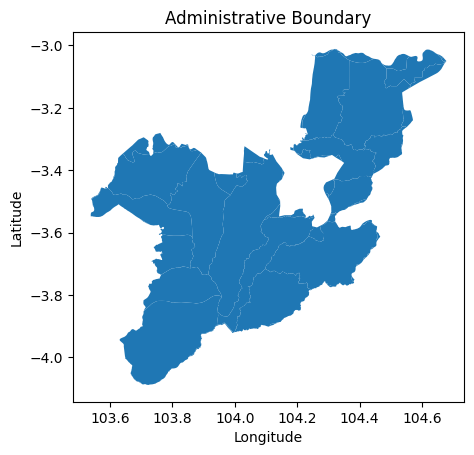

In [ ]:
# Import library
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from sklearn.mixture import GaussianMixture
from geopy.distance import great_circle

# Baca shapefile
shapefile = '/content/ADMINISTRASIKECAMATAN_AR_50K.shp'
gdf_boundary = gpd.read_file(shapefile)

# Baca data kepadatan penduduk dari file CSV
file_csv = '/content/PendudukMuaraEnim.csv'  # Ganti dengan path file CSV Anda
df_population_density = pd.read_csv(file_csv)

# Perbaiki format koordinat yang menggunakan tanda koma
df_population_density['Latitude'] = df_population_density['Latitude'].str.replace(',', '.').astype(float)
df_population_density['Longitude'] = df_population_density['Longitude'].str.replace(',', '.').astype(float)

# Konversi data CSV ke dalam bentuk geometri titik
geometry = [Point(xy) for xy in zip(df_population_density['Longitude'], df_population_density['Latitude'])]
crs = {'init': 'epsg:4326'}  # WGS84
gdf_population_density = gpd.GeoDataFrame(df_population_density, crs=crs, geometry=geometry)

# Visualisasi batas administrasi
gdf_boundary.plot()
plt.title('Administrative Boundary')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

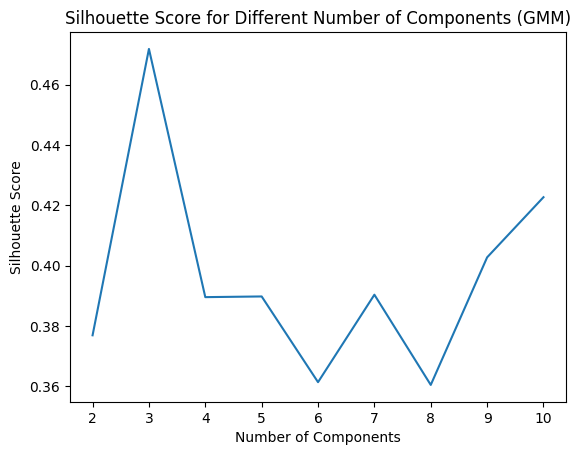

Best Number of Components: 3


In [ ]:
from sklearn.metrics import silhouette_score
import numpy as np

# Inisialisasi list untuk menyimpan nilai silhouette score
silhouette_scores = []

# Iterasi melalui jumlah komponen yang diinginkan
for n_components in range(2, 11):
    # Lakukan clustering dengan Gaussian Mixture Models
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(gdf_population_density[['Longitude', 'Latitude']])

    # Dapatkan label cluster
    cluster_labels = gmm.predict(gdf_population_density[['Longitude', 'Latitude']])

    # Hitung Silhouette Score
    score = silhouette_score(gdf_population_density[['Longitude', 'Latitude']], cluster_labels)
    silhouette_scores.append(score)

# Plot Silhouette Score untuk jumlah komponen yang berbeda
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Components')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Number of Components (GMM)')
plt.show()

# Dapatkan jumlah komponen terbaik
best_n_components = np.argmax(silhouette_scores) + 2  # +2 karena range dimulai dari 2

print("Best Number of Components:", best_n_components)

<Figure size 1000x600 with 0 Axes>

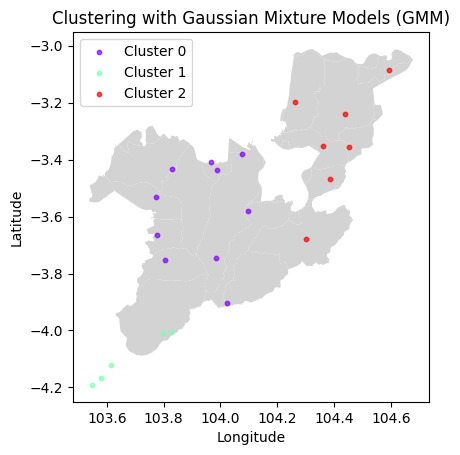

In [ ]:
# Lakukan clustering dengan Gaussian Mixture Models menggunakan jumlah komponen terbaik
best_gmm = GaussianMixture(n_components=best_n_components, random_state=42)
best_gmm.fit(gdf_population_density[['Longitude', 'Latitude']])

# Dapatkan label cluster
cluster_labels = best_gmm.predict(gdf_population_density[['Longitude', 'Latitude']])

# Tentukan kategori berdasarkan label cluster
gdf_population_density['Cluster_Labels'] = cluster_labels

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
gdf_boundary.plot(color='lightgray')
colors = plt.cm.rainbow(np.linspace(0, 1, best_n_components))  # Generate colors for each cluster
for label, color in zip(range(best_n_components), colors):
    gdf_population_density[gdf_population_density['Cluster_Labels'] == label].plot(ax=plt.gca(), color=color, label=f'Cluster {label}', markersize=10, alpha=0.7)
plt.title('Clustering with Gaussian Mixture Models (GMM)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


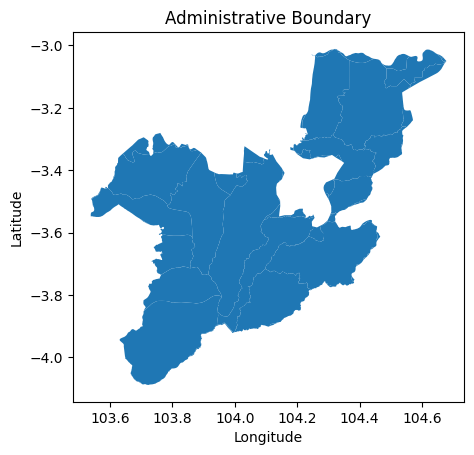

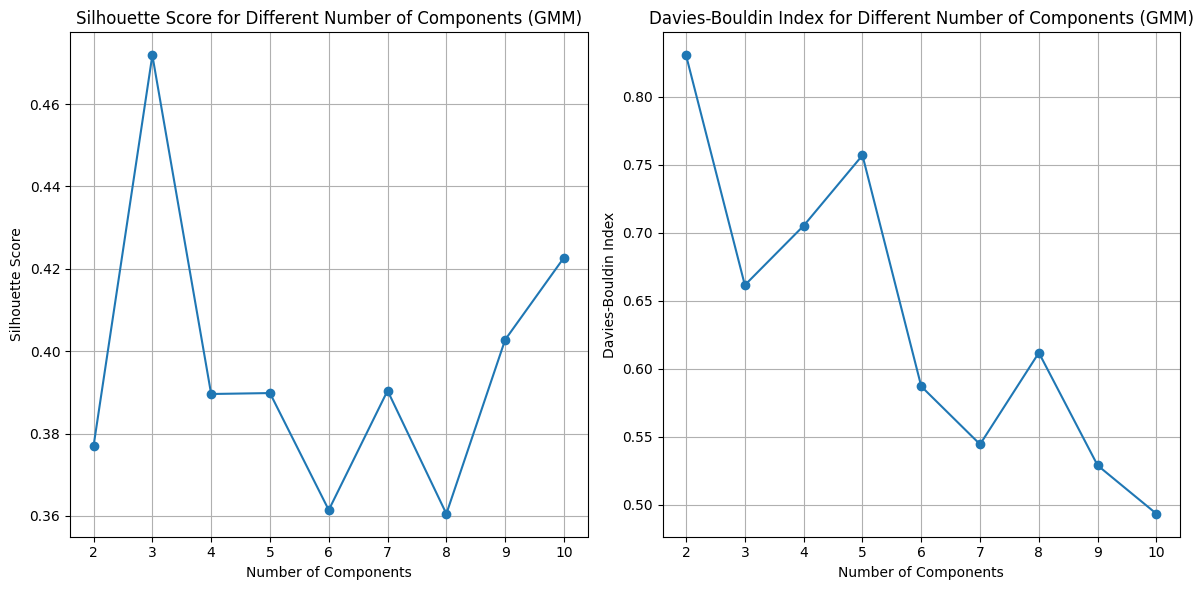

Best Number of Components (Silhouette Score): 3
Silhouette Score: 0.4718760296916544
Best Number of Components (Davies-Bouldin Index): 10
Davies-Bouldin Index: 0.49342583606112955


<Figure size 1000x600 with 0 Axes>

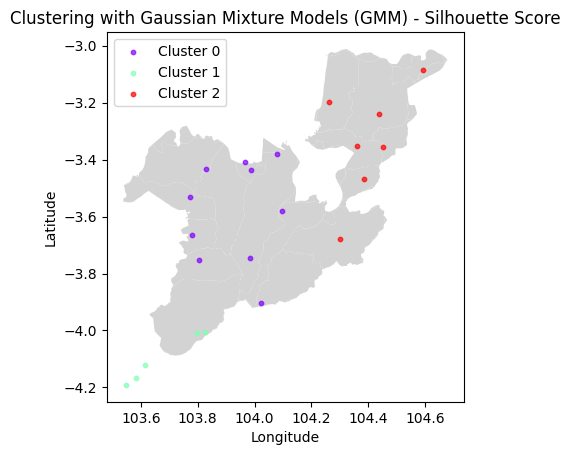

<Figure size 1000x600 with 0 Axes>

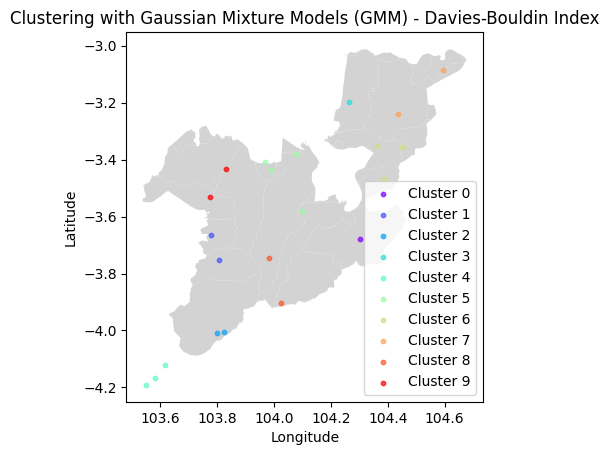

In [ ]:
# Import library
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
from geopy.distance import great_circle

# Baca shapefile
shapefile = '/content/ADMINISTRASIKECAMATAN_AR_50K.shp'
gdf_boundary = gpd.read_file(shapefile)

# Baca data kepadatan penduduk dari file CSV
file_csv = '/content/PendudukMuaraEnim.csv'  # Ganti dengan path file CSV Anda
df_population_density = pd.read_csv(file_csv)

# Perbaiki format koordinat yang menggunakan tanda koma
df_population_density['Latitude'] = df_population_density['Latitude'].str.replace(',', '.').astype(float)
df_population_density['Longitude'] = df_population_density['Longitude'].str.replace(',', '.').astype(float)

# Konversi data CSV ke dalam bentuk geometri titik
geometry = [Point(xy) for xy in zip(df_population_density['Longitude'], df_population_density['Latitude'])]
crs = {'init': 'epsg:4326'}  # WGS84
gdf_population_density = gpd.GeoDataFrame(df_population_density, crs=crs, geometry=geometry)

# Visualisasi batas administrasi
gdf_boundary.plot()
plt.title('Administrative Boundary')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


# Inisialisasi list untuk menyimpan nilai silhouette score dan Davies-Bouldin Index
silhouette_scores = []
davies_bouldin_scores = []

# Iterasi melalui jumlah komponen yang diinginkan
for n_components in range(2, 11):
    # Lakukan clustering dengan Gaussian Mixture Models
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(gdf_population_density[['Longitude', 'Latitude']])

    # Dapatkan label cluster
    cluster_labels = gmm.predict(gdf_population_density[['Longitude', 'Latitude']])

    # Hitung Silhouette Score
    silhouette = silhouette_score(gdf_population_density[['Longitude', 'Latitude']], cluster_labels)
    silhouette_scores.append(silhouette)

    # Hitung Davies-Bouldin Index
    davies_bouldin = davies_bouldin_score(gdf_population_density[['Longitude', 'Latitude']], cluster_labels)
    davies_bouldin_scores.append(davies_bouldin)

# Plot Silhouette Score dan Davies-Bouldin Index untuk jumlah komponen yang berbeda
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Number of Components (GMM)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), davies_bouldin_scores, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for Different Number of Components (GMM)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Dapatkan jumlah komponen terbaik berdasarkan Silhouette Score
best_n_components_silhouette = np.argmax(silhouette_scores) + 2  # +2 karena range dimulai dari 2
best_silhouette_score = silhouette_scores[best_n_components_silhouette - 2]  # -2 karena indexing dimulai dari 0
print("Best Number of Components (Silhouette Score):", best_n_components_silhouette)
print("Silhouette Score:", best_silhouette_score)

# Dapatkan jumlah komponen terbaik berdasarkan Davies-Bouldin Index
best_n_components_davies = np.argmin(davies_bouldin_scores) + 2  # +2 karena range dimulai dari 2
best_davies_bouldin_score = davies_bouldin_scores[best_n_components_davies - 2]  # -2 karena indexing dimulai dari 0
print("Best Number of Components (Davies-Bouldin Index):", best_n_components_davies)
print("Davies-Bouldin Index:", best_davies_bouldin_score)


# Lakukan clustering dengan Gaussian Mixture Models menggunakan jumlah komponen terbaik (berdasarkan Silhouette Score)
best_gmm_silhouette = GaussianMixture(n_components=best_n_components_silhouette, random_state=42)
best_gmm_silhouette.fit(gdf_population_density[['Longitude', 'Latitude']])
cluster_labels_silhouette = best_gmm_silhouette.predict(gdf_population_density[['Longitude', 'Latitude']])

# Lakukan clustering dengan Gaussian Mixture Models menggunakan jumlah komponen terbaik (berdasarkan Davies-Bouldin Index)
best_gmm_davies = GaussianMixture(n_components=best_n_components_davies, random_state=42)
best_gmm_davies.fit(gdf_population_density[['Longitude', 'Latitude']])
cluster_labels_davies = best_gmm_davies.predict(gdf_population_density[['Longitude', 'Latitude']])


# Visualisasi hasil clustering dengan jumlah komponen terbaik berdasarkan Silhouette Score
plt.figure(figsize=(10, 6))
gdf_boundary.plot(color='lightgray')
colors_silhouette = plt.cm.rainbow(np.linspace(0, 1, best_n_components_silhouette))  # Generate colors for each cluster
for label, color in zip(range(best_n_components_silhouette), colors_silhouette):
    gdf_population_density[cluster_labels_silhouette == label].plot(ax=plt.gca(), color=color, label=f'Cluster {label}', markersize=10, alpha=0.7)
plt.title('Clustering with Gaussian Mixture Models (GMM) - Silhouette Score')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

# Visualisasi hasil clustering dengan jumlah komponen terbaik berdasarkan Davies-Bouldin Index
plt.figure(figsize=(10, 6))
gdf_boundary.plot(color='lightgray')
colors_davies = plt.cm.rainbow(np.linspace(0, 1, best_n_components_davies))  # Generate colors for each cluster
for label, color in zip(range(best_n_components_davies), colors_davies):
    gdf_population_density[cluster_labels_davies == label].plot(ax=plt.gca(), color=color, label=f'Cluster {label}', markersize=10, alpha=0.7)
plt.title('Clustering with Gaussian Mixture Models (GMM) - Davies-Bouldin Index')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


## OPTICS

<ipython-input-37-5c79c509b53f>:52: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(gdf_population_density['Longitude'], gdf_population_density['Latitude'], c=gdf_population_density['Population_Category'].map(colors), cmap='viridis', s=50)


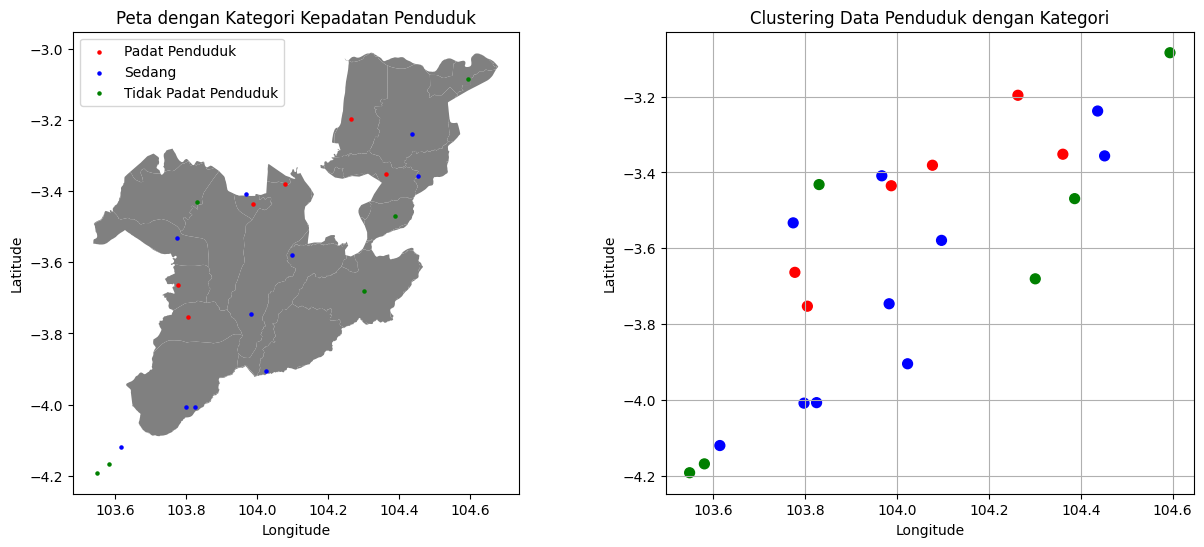

In [ ]:
from sklearn.cluster import OPTICS

# Lakukan clustering dengan OPTICS
optics_cluster = OPTICS(min_samples=10, xi=0.05, min_cluster_size=0.05).fit(gdf_population_density[['Longitude', 'Latitude']])

# Dapatkan label cluster
cluster_labels = optics_cluster.labels_

# Tentukan dua kategori berdasarkan label cluster
# Misalnya, label -1 dianggap sebagai daerah tidak padat penduduk, sedangkan label lainnya dianggap sebagai daerah padat penduduk
binary_labels = ['Daerah Tidak Padat Penduduk' if label == -1 else 'Daerah Padat Penduduk' for label in cluster_labels]

# Tambahkan kolom binary_labels ke dalam DataFrame
gdf_population_density['Binary_Labels'] = binary_labels

# Hitung statistik deskriptif dari kepadatan penduduk untuk setiap cluster
cluster_statistics = gdf_population_density.groupby('Binary_Labels')['Kepadatan_Penduduk'].describe()

# Tentukan batasan untuk setiap kategori (padat, sedang, tidak padat)
# Misalnya, Anda bisa menggunakan quartile atau persentil untuk menentukan batasan
padat_threshold = cluster_statistics.loc['Daerah Padat Penduduk']['75%']
tidak_padat_threshold = cluster_statistics.loc['Daerah Padat Penduduk']['25%']

# Membagi hasil clustering menjadi tiga kategori berdasarkan batasan yang ditentukan
def categorize_population_density(population_density):
    if population_density > padat_threshold:
        return 'Padat Penduduk'
    elif population_density > tidak_padat_threshold:
        return 'Sedang'
    else:
        return 'Tidak Padat Penduduk'

# Menambahkan kolom kategori ke dalam DataFrame
gdf_population_density['Population_Category'] = gdf_population_density['Kepadatan_Penduduk'].apply(categorize_population_density)

# Plot hasil clustering dengan kategori baru
plt.figure(figsize=(15, 6))

# Plot peta dengan kategori warna berdasarkan kategori kepadatan penduduk
ax = plt.subplot(121)
gdf_boundary.plot(ax=ax, color='gray')
for category, group in gdf_population_density.groupby('Population_Category'):
    group.plot(ax=ax, color='red' if category == 'Padat Penduduk' else 'blue' if category == 'Sedang' else 'green', markersize=5, label=category)
plt.title('Peta dengan Kategori Kepadatan Penduduk')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

# Plot clustering dengan kategori warna
plt.subplot(122)
colors = {'Padat Penduduk': 'red', 'Sedang': 'blue', 'Tidak Padat Penduduk': 'green'}
plt.scatter(gdf_population_density['Longitude'], gdf_population_density['Latitude'], c=gdf_population_density['Population_Category'].map(colors), cmap='viridis', s=50)
plt.title('Clustering Data Penduduk dengan Kategori')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

plt.show()


In [ ]:
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Lakukan clustering dengan OPTICS
optics_cluster = OPTICS(min_samples=2, xi=0.01, min_cluster_size=0.01).fit(gdf_population_density[['Longitude', 'Latitude']])

# Dapatkan label cluster
cluster_labels = optics_cluster.labels_

# Pastikan ada lebih dari satu cluster yang dihasilkan
if len(set(cluster_labels)) < 2:
    print("Optics hanya menghasilkan satu cluster. Coba sesuaikan parameter.")
else:
    # Hitung silhouette score
    silhouette = silhouette_score(gdf_population_density[['Longitude', 'Latitude']], cluster_labels)

    # Hitung Davies-Bouldin index
    davies_bouldin = davies_bouldin_score(gdf_population_density[['Longitude', 'Latitude']], cluster_labels)

    print("Silhouette Score:", silhouette)
    print("Davies-Bouldin Index:", davies_bouldin)


Silhouette Score: 0.462939675251554
Davies-Bouldin Index: 0.4730786385406649
